# <img src="https://img.icons8.com/external-flaticons-lineal-color-flat-icons/64/undefined/external-big-data-smart-technology-flaticons-lineal-color-flat-icons-2.png"/> **NLP Research<br>Bert Relation Extraction in Biomedical using Biobert model and pytorch**
## <img src="https://img.icons8.com/external-smashingstocks-flat-smashing-stocks/64/000000/external-manager-hotel-smashingstocks-flat-smashing-stocks-2.png"/> **`Slamet Riyanto S.Kom., M.M.S.I.`**
## <img src="https://img.icons8.com/external-fauzidea-flat-fauzidea/64/undefined/external-man-avatar-avatar-fauzidea-flat-fauzidea.png"/> **`Dimas Dwi Putra`**

# <img src="https://img.icons8.com/glyph-neue/64/undefined/github.png"/> [**NLP - Bert Relation Extraction Biomedical**](https://github.com/Dimas263/nlp_bert_relation_extraction)
# <img src="https://img.icons8.com/color/48/undefined/microsoft-excel-2019--v1.png"/> [**Relation Extraction Report**](https://docs.google.com/spreadsheets/d/1xWAez5AVHliaSEBrvyjcgMn87J8ggs_M/edit?usp=sharing&ouid=112732875358313299447&rtpof=true&sd=true)
# <img src="https://img.icons8.com/fluency/48/000000/serial-tasks.png"/> [**Architecture**](https://dimas263.github.io/work/data/RE-Architecture.html)

# <img src="https://img.icons8.com/color/48/undefined/1-circle--v1.png"/>**Connect Google Storage**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <img src="https://img.icons8.com/color/48/undefined/2-circle--v1.png"/>**Requirements**

In [ ]:
# ! pip install pandas==1.4.2
# ! pip install matplotlib==3.5.1
! pip install openpyxl==3.0.9
# ! pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
! pip install transformers==4.18.0
! pip install scikit-learn==1.0.2
! pip install pickle5==0.0.12

# <img src="https://img.icons8.com/color/48/undefined/3-circle--v1.png"/>**Check Device**

In [ ]:
import torch

USE_CUDA = torch.cuda.is_available()

if USE_CUDA:
    device = torch.device("cuda")
    print("\nUsing GPU")
    print('\nDevice name:', torch.cuda.get_device_name(0))
else:
    print("\nNo GPU available, using the CPU instead.")


Using GPU

Device name: Tesla P100-PCIE-16GB


# <img src="https://img.icons8.com/color/48/undefined/4-circle--v1.png"/>**Data Preprocessing into `train set` and `test set`**

In [ ]:
! python "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/input/data/data_preprocessing.py"

Negative                583
Treatment_of_disease    507
Cause_of_disease        183
Association              34
Name: relation, dtype: int64
total data : 1307

success to create predict.txt
success to create train.txt
success to create test.txt


# <img src="https://img.icons8.com/color/48/undefined/5-circle--v1.png"/>**Preprocess Program**
### **preprocess data with special token using `biobert pretrained model`**

In [ ]:
! python "./drive/MyDrive/Colab Notebooks/bert_relation_extraction/preprocess.py" \
--bert_dir="./drive/MyDrive/Colab Notebooks/bert_relation_extraction/model/Biobert/" \
--data_dir="./drive/MyDrive/Colab Notebooks/bert_relation_extraction/input/data/" \
--log_dir="./drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/" \
--main_log_dir="./drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/Biobert-main.log" \
--preprocess_log_dir="./drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/Biobert-preprocess.log" \
--output_dir="./drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/checkpoint/Biobert/" \
--num_tags=4 \
--seed=123 \
--gpu_ids="0" \
--max_seq_len=128 \
--lr=2e-5 \
--other_lr=2e-4 \
--train_batch_size=32 \
--train_epochs=100 \
--eval_batch_size=32 \
--dropout_prob=0.2 \

{'output_dir': './drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/checkpoint/Biobert/', 'bert_dir': './drive/MyDrive/Colab Notebooks/bert_relation_extraction/model/Biobert/', 'data_dir': './drive/MyDrive/Colab Notebooks/bert_relation_extraction/input/data/', 'log_dir': './drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/', 'main_log_dir': './drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/Biobert-main.log', 'preprocess_log_dir': './drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/Biobert-preprocess.log', 'num_tags': 4, 'seed': 123, 'gpu_ids': '0', 'max_seq_len': 128, 'eval_batch_size': 32, 'swa_start': 3, 'train_epochs': 100, 'dropout_prob': 0.2, 'lr': 2e-05, 'other_lr': 0.0002, 'max_grad_norm': 1, 'warmup_proportion': 0.1, 'weight_decay': 0.01, 'adam_epsilon': 1e-12, 'train_batch_size': 32, 'eval_model': True}
example_text : However, more studies need to further explore the roles of vitex agnus castus in fracture rep

# <img src="https://img.icons8.com/color/48/undefined/6-circle--v1.png"/>**Main Program**
### **`train`, `eval`, create new `model pytorch`, test model , <br>compute `cross validation`, `f-1 score`, and <br>test predict data with new model `.pt`**

In [ ]:
! python "./drive/MyDrive/Colab Notebooks/bert_relation_extraction/main.py" \
--bert_dir="./drive/MyDrive/Colab Notebooks/bert_relation_extraction/model/Biobert/" \
--data_dir="./drive/MyDrive/Colab Notebooks/bert_relation_extraction/input/data/" \
--log_dir="./drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/" \
--main_log_dir="./drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/Biobert-main.log" \
--preprocess_log_dir="./drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/Biobert-preprocess.log" \
--output_dir="./drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/checkpoint/Biobert/" \
--num_tags=4 \
--seed=123 \
--gpu_ids="0" \
--max_seq_len=128 \
--lr=2e-5 \
--other_lr=2e-4 \
--train_batch_size=32 \
--train_epochs=100 \
--eval_batch_size=32 \
--dropout_prob=0.2 \

{'Negative': 0, 'Cause_of_disease': 1, 'Treatment_of_disease': 2, 'Association': 3}
NumExpr defaulting to 2 threads.
======== Training And Validation========
torch.Size([32, 4, 768])
【train】 epoch：0 step:0/600 loss：1.598272
torch.Size([32, 4, 768])
torch.Size([15, 4, 768])
【dev】 loss：2.566889 accuracy：0.4043 micro_f1：0.4043 macro_f1：0.1809
------------>Save best model
torch.Size([32, 4, 768])
【train】 epoch：0 step:1/600 loss：1.271016
torch.Size([32, 4, 768])
torch.Size([15, 4, 768])
【dev】 loss：2.413135 accuracy：0.4043 micro_f1：0.4043 macro_f1：0.1439
torch.Size([32, 4, 768])
【train】 epoch：0 step:2/600 loss：1.203587
torch.Size([32, 4, 768])
torch.Size([15, 4, 768])
【dev】 loss：2.456499 accuracy：0.3191 micro_f1：0.3191 macro_f1：0.1812
------------>Save best model
torch.Size([32, 4, 768])
【train】 epoch：0 step:3/600 loss：1.127348
torch.Size([32, 4, 768])
torch.Size([15, 4, 768])
【dev】 loss：2.647859 accuracy：0.2979 micro_f1：0.2979 macro_f1：0.1148
torch.Size([32, 4, 768])
【train】 epoch：0 step:4/

In [ ]:
! python "./drive/MyDrive/Colab Notebooks/bert_relation_extraction/predict.py" \
--bert_dir="./drive/MyDrive/Colab Notebooks/bert_relation_extraction/model/Biobert/" \
--data_dir="./drive/MyDrive/Colab Notebooks/bert_relation_extraction/input/data/" \
--log_dir="./drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/" \
--main_log_dir="./drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/Biobert-main.log" \
--preprocess_log_dir="./drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/Biobert-preprocess.log" \
--output_dir="./drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/checkpoint/Biobert/" \
--num_tags=4 \
--seed=123 \
--gpu_ids="0" \
--max_seq_len=128 \
--lr=2e-5 \
--other_lr=2e-4 \
--train_batch_size=32 \
--train_epochs=100 \
--eval_batch_size=32 \
--dropout_prob=0.2 \

{'Negative': 0, 'Cause_of_disease': 1, 'Treatment_of_disease': 2, 'Association': 3}
======== Prediction ========
OBJECTIVE: To study the role of pecan tree pollen in the development of allergy . 
torch.Size([1, 4, 768])
predict labels：Association
true label：Negative
 Garlic consumption and cancer prevention: meta-analyses of colorectal and stomach cancers . 
torch.Size([1, 4, 768])
predict labels：Association
true label：Negative
Patients with anaphylaxis to pea can have peanut allergy caused by cross-reactive IgE to vicilin (Ara h 1). 
torch.Size([1, 4, 768])
predict labels：Association
true label：Cause_of_disease
Genetic predisposition to schizophrenia associated with increased use of cannabis . 
torch.Size([1, 4, 768])
predict labels：Association
true label：Negative
Efficacy of cancer prevention by high-selenium garlic is primarily dependent on the action of selenium. 
torch.Size([1, 4, 768])
predict labels：Association
true label：Treatment_of_disease
Mutagen sensitivity, tobacco smoking

# <img src="https://img.icons8.com/color/48/undefined/7-circle--v1.png"/>**Summary**

### ***Train Output***

In [ ]:
import pandas as pd
import csv

url = 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/visualization/biobert-train.csv'

biobert_train = pd.read_csv(url, header=0)
biobert_train

,Time,Epoch,Step,Loss
0,2022-06-27 20:11:39,0,0,1.598272
1,2022-06-27 20:11:47,0,1,1.271016
2,2022-06-27 20:11:48,0,2,1.203587
3,2022-06-27 20:11:55,0,3,1.127348
4,2022-06-27 20:11:56,0,4,1.281890
...,...,...,...,...
595,2022-06-27 20:22:11,99,595,0.001328
596,2022-06-27 20:22:11,99,596,0.001070
597,2022-06-27 20:22:12,99,597,0.001927
598,2022-06-27 20:22:13,99,598,0.001206


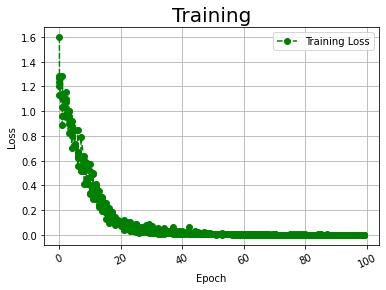

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

x = biobert_train['Epoch']
y = biobert_train['Loss']

plt.plot(x, y, color='g', linestyle='dashed', marker='o', label="Training Loss", data=None)

plt.xticks(rotation=25)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training', fontsize=20)
plt.grid()
plt.legend()
plt.show()

In [ ]:
! python "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/visualization/biobert-train-chart.py"

### ***Dev Output***

In [ ]:
dev_url = 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/visualization/biobert-dev.csv'

biobert_dev = pd.read_csv(dev_url, header=0)
biobert_dev

,Time,Loss,accuracy,micro_f1,macro_f1
0,2022-06-27 20:11:39,2.566889,0.4043,0.4043,0.1809
1,2022-06-27 20:11:48,2.413135,0.4043,0.4043,0.1439
2,2022-06-27 20:11:49,2.456499,0.3191,0.3191,0.1812
3,2022-06-27 20:11:56,2.647859,0.2979,0.2979,0.1148
4,2022-06-27 20:11:57,2.631683,0.3191,0.3191,0.1210
...,...,...,...,...,...
595,2022-06-27 20:22:11,2.337101,0.6809,0.6809,0.7594
596,2022-06-27 20:22:12,2.335074,0.6809,0.6809,0.7594
597,2022-06-27 20:22:13,2.330156,0.6809,0.6809,0.7594
598,2022-06-27 20:22:13,2.325429,0.6809,0.6809,0.7594


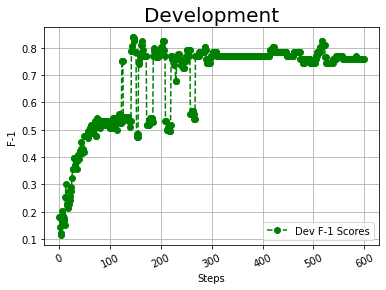

In [ ]:
x = biobert_dev['Loss']
y = biobert_dev['macro_f1']

plt.plot(y, color='g', linestyle='dashed', marker='o', label="Dev F-1 Scores")

plt.xticks(rotation=25)
plt.xlabel('Steps')
plt.ylabel('F-1')
plt.title('Development', fontsize=20)
plt.grid()
plt.legend()
plt.show()

In [ ]:
! python "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/visualization/biobert-dev-chart.py"

### ***Training, Validation, Test***

```
2022-06-27 20:16:10,025 - INFO - main.py - train - 86 - 【train】 epoch：24 step:145/600 loss：0.047816
2022-06-27 20:16:10,409 - INFO - main.py - train - 92 - 【dev】 loss：1.506330 accuracy：0.7872 micro_f1：0.7872 macro_f1：0.8393
2022-06-27 20:16:10,410 - INFO - main.py - train - 94 - ------------>Save best model
...
======== Calculate Testing========
torch.Size([32, 4, 768])
torch.Size([15, 4, 768])
【test】 loss：1.506330 accuracy：0.7872 micro_f1：0.7872 macro_f1：0.8393
```

```
                        precision    recall  per-class   support
                                             f1-scores

            Negative       0.63      0.80      0.71        15
    Cause_of_disease       0.90      0.75      0.82        12
Treatment_of_disease       0.88      0.79      0.83        19
         Association       1.00      1.00      1.00         1

```


<center><img src="https://img.icons8.com/external-royyan-wijaya-detailed-outline-royyan-wijaya/24/undefined/external-arrow-arrow-line-royyan-wijaya-detailed-outline-royyan-wijaya-8.png"/></center>


```
                      precision    recall   Average     support
                                            f1-scores
            
            accuracy                           0.79        47
           macro avg       0.85      0.83      0.84        47
        weighted avg       0.81      0.79      0.79        47
```

### **Model Output**

In [ ]:
! ls -lh "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/checkpoint/Biobert"

total 1.3G
-rw------- 1 root root 1.3G Jun 27 20:17 best.pt


In [ ]:
import torch
import os

checkpoint_file = "/content/drive/MyDrive/bert_relation_extraction/output/checkpoint/Biobert/best.pt"
model = torch.load(checkpoint_file , map_location='cpu')
model

Output hidden; open in https://colab.research.google.com to view.

<br><br><br>
# "*Alone we can do so little, together we can do so much*"